In [2]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('../..'))) # access sibling directories
sys.path.append("C:\\Users\\lasse\\Documents\\GitHub\\BayesFlow")

from src.python.settings import summary_meta_validation, probability_meta_validation
from src.python.networks import HierarchicalInvariantNetwork, ModelProbabilityNetwork
from src.python.models import HierarchicalNormalSimulator, MainSimulator
from src.python.losses import softmax_loss
from src.python.helpers import n_clust_obs_v_v, get_preds_and_bfs
from src.python.visualization import compute_eces_variable, plot_eces_variable, plot_eces_marginalized

import numpy as np
import pandas as pd
from tensorflow.keras.experimental import CosineDecay
from tensorflow.keras.optimizers import Adam
from functools import partial
from time import perf_counter
from datetime import datetime, timezone, timedelta

from bayesflow.trainers import ModelComparisonTrainer
from bayesflow.amortizers import MultiModelAmortizer

# Model formulation

$$
\begin{align}
x_n &\sim \mathcal{N}(\theta_l, \sigma^2) \text{ for } n=1,...,N \\
\theta_l &\sim \mathcal{N}(\mu, \tau^2) \text{ for } l=1,...,L\\
\sigma^2 &\sim Half-Normal(\sigma_s)\\
\mu &\sim \mathcal{N}(\mu_0, \tau_0)\\
\tau^2 &\sim Half-Normal(\sigma_t)\\
\end{align}
$$

$$
\begin{align}
&\text{Null Model }M_0 \text{: } \mu=0\\
&\text{Alternative Model }M_1 \text{: } \mu \text{ allowed to differ from 0} \\
\end{align}
$$

# Set up networks

In [3]:
summary_net = HierarchicalInvariantNetwork(summary_meta_validation)
probability_net = ModelProbabilityNetwork(probability_meta_validation)

amortizer = MultiModelAmortizer(probability_net, summary_net)

simulator = MainSimulator(HierarchicalNormalSimulator())

In [4]:
# Training steps
epochs = 40 
iterations_per_epoch = 1000

# Range of groups and nested observations
n_clust_min = 1
n_clust_max = 100
n_obs_min = 1
n_obs_max = 100

# Cosine decaying learning rate
initial_lr = 0.0005
decay_steps = epochs*iterations_per_epoch
alpha = 0
lr_schedule = CosineDecay(
    initial_lr, decay_steps, alpha=alpha
    )

# Checkpoint path for loading pretrained network and saving the final network
checkpoint_path = 'C:\\Users\\lasse\\Documents\\hierarchical_model_comparison_project\\checkpoints\\01_calibration_validation\\checkpoints_var_sizes'

trainer = ModelComparisonTrainer(
    network=amortizer, 
    generative_model=simulator, 
    loss=partial(softmax_loss),
    optimizer=partial(Adam, lr_schedule),
    checkpoint_path=checkpoint_path,
    skip_checks=True,
    )

Initializing networks from scratch.


# Train & validate

In [5]:
training_time_start = perf_counter()
losses = trainer.train_online(
    epochs=epochs, iterations_per_epoch=iterations_per_epoch, batch_size=32, 
    n_obs=partial(n_clust_obs_v_v, n_clust_min, n_clust_max, n_obs_min, n_obs_max)
    )
training_time_stop = perf_counter()

Training epoch 1:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 2:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 11:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 12:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 13:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 14:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 15:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 16:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 17:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 18:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 19:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 20:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 21:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 22:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 23:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 24:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 25:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 26:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 27:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 28:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 29:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 30:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 31:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 32:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 33:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 34:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 35:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 36:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 37:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 38:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 39:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 40:   0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
# Validation
n_val_per_setting = 5000
get_accuracies = True # Compute accuracies additionally to ECEs?

if not get_accuracies:
    eces = compute_eces_variable(
    probability_net, summary_net, simulator, 
    n_val_per_setting, n_clust_min, n_clust_max, 
    n_obs_min, n_obs_max
    )

if get_accuracies:
    eces, accuracies = compute_eces_variable(
        probability_net, summary_net, simulator, 
        n_val_per_setting, n_clust_min, n_clust_max, 
        n_obs_min, n_obs_max, add_accuracy=True
        )

Loop through clusters progress:   0%|          | 0/100 [00:00<?, ?it/s]

Loop through nested observations progress:   0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
# Plot ECEs
plot_eces_variable(eces, n_clust_min, n_clust_max, n_obs_min, n_obs_max, save=False)

NameError: name 'ece_means' is not defined

Mean ECE = 0.86189452


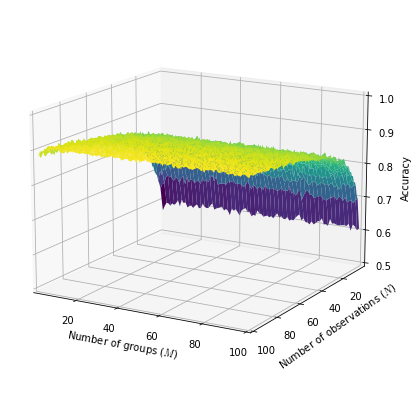

In [ ]:
# Plot accuracies
plot_accuracies = True

if plot_accuracies:
    plot_eces_variable(accuracies, n_clust_min, n_clust_max, n_obs_min, n_obs_max, zlims=[0.5, 1], zlabel='Accuracy', save=False)

[0.03976436 0.03990685 0.03950575 0.04247136 0.04218206]


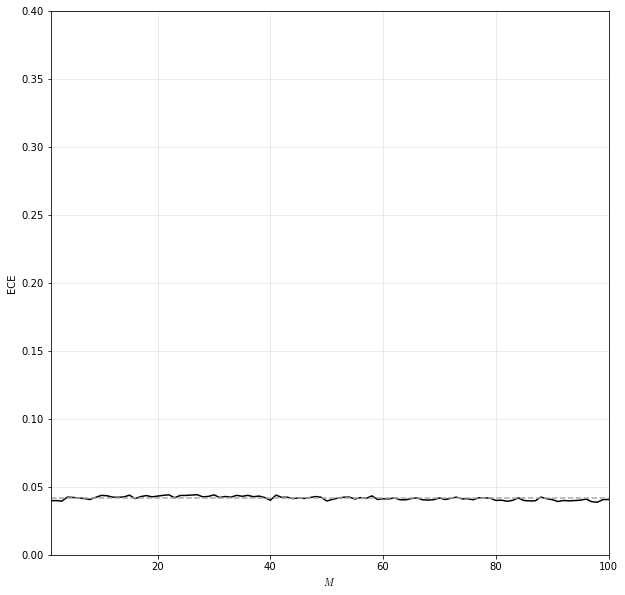

In [17]:
# Plot ECEs for diffent J's (averaged over N)
plot_eces_marginalized(eces, n_clust_min, n_clust_max, n_obs_min, n_obs_max, x_axis=0)

[0.09253617 0.05324117 0.04301675 0.04057226 0.03614685]


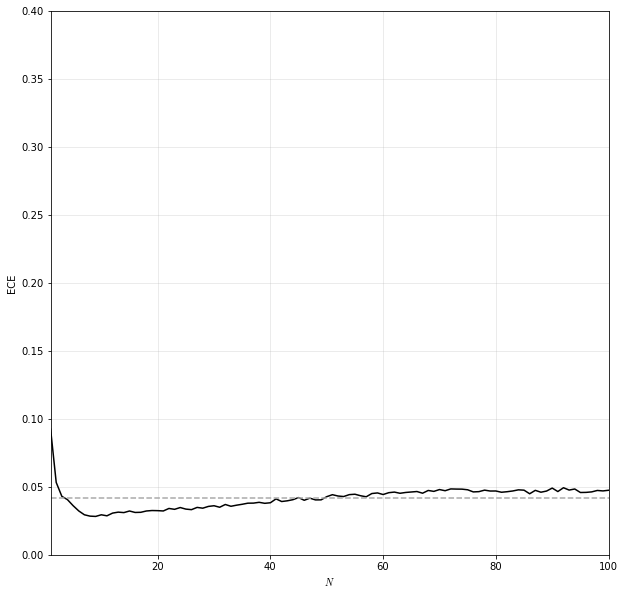

In [18]:
# Plot ECEs for diffent N's (averaged over J)
plot_eces_marginalized(eces, n_clust_min, n_clust_max, n_obs_min, n_obs_max, x_axis=1)

In [19]:
# Export ECE data
local_timezone = datetime.now(timezone(timedelta(0))).astimezone().tzinfo
filename = pd.Timestamp.today(tz=local_timezone).strftime('%Y_%m_%d_eces_var_sizes')
val_folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'data', '01_calibration_validation', 'eces')
np.save(os.path.join(val_folder, filename), eces)

In [8]:
# Save training meta-information for bridge sampling comparison?
save_training_vars = True

if save_training_vars:
    folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'data', '01_calibration_validation', '03_variable')

    np.save(os.path.join(folder, 'training_time_start'), training_time_start, allow_pickle=True)
    np.save(os.path.join(folder, 'training_time_stop'), training_time_stop, allow_pickle=True)
    np.save(os.path.join(folder, 'losses'), losses, allow_pickle=True)

In [5]:
# Load ECE data
n_val_per_setting = 5000

n_clust_min = 1
n_clust_max = 100
n_obs_min = 1
n_obs_max = 100

val_folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'data', '01_calibration_validation')
ece_filename = "2022_08_10_eces_var_sizes.npy"
eces = np.load(os.path.join(val_folder, ece_filename))

# Calculate Bayes factors for bridge sampling comparison

In [9]:
# Import training meta-information? (if network was loaded from checkpoint)
import_training_vars = False

if import_training_vars:
    folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'data', '01_calibration_validation', '03_variable')

    training_time_start = np.load(os.path.join(folder, 'training_time_start.npy'), allow_pickle=True)
    training_time_stop = np.load(os.path.join(folder, 'training_time_stop.npy'), allow_pickle=True)
    losses = np.load(os.path.join(folder, 'losses.npy'), allow_pickle=True).item()

In [10]:
# Import test data
val_folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'data', '02_bridge_sampling_comparison', 'nested_models')
data_filename = "test_data.npy"
test_data = np.load(os.path.join(val_folder, data_filename), allow_pickle=True).item()

In [11]:
# Get NN predictions
comparison_results = get_preds_and_bfs(probability_net, summary_net, test_data, training_time_start, training_time_stop, losses)
comparison_results.head(5)

,dataset,true_model,m0_prob,m1_prob,selected_model,bayes_factor,training_time,inference_time,final_epoch_loss
0,1,0,0.818189,0.181811,0,0.222211,2912.233736,0.00317,0.325452
1,2,0,0.873253,0.126747,0,0.145144,2912.233736,0.00317,0.325452
2,3,0,0.889816,0.110184,0,0.123828,2912.233736,0.00317,0.325452
3,4,1,0.000006,0.999994,1,164481.509804,2912.233736,0.00317,0.325452
4,5,0,0.887359,0.112641,0,0.126939,2912.233736,0.00317,0.325452


In [12]:
# Export results
local_timezone = datetime.now(timezone(timedelta(0))).astimezone().tzinfo
filename = pd.Timestamp.today(tz=local_timezone).strftime('%Y_%m_%d_BF_NN_variable')
comparison_folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'data', '02_bridge_sampling_comparison', 'nested_models')

comparison_results.to_csv(os.path.join(comparison_folder, filename), index = False)